# Ejercicio 6

Tenemos que la funcion de distribucion es
$$\begin{align}
&F(x) = x^n  & & 0 \le x \le 1
\end{align}$$

Lo cual implica qque la funcion de probabilidad de masa es 
$$\begin{align}
&f(x) = n*x^{n-1} & & 0 \le x \le 1
\end{align}$$

Podemos tomar $g(y)$ la funcion de masa de una Uniforme 0,1 y...
$$\begin{align}
&h(x) = n*x^{n-1} & & 0 \lt x \le 1
\end{align}$$

$$
\lim_{x\to 0} = 0
$$

$$
\lim_{x\to 1} = n
$$

$h(x)$ tiene maximo en 1 y es n, por lo tanto tomamos c = n

In [40]:
import random as rnd

def fmass(x,n):
    return n*x**(n-1)

def fdist(x, n):
    return x**n

def tinv(n):
    u = rnd.random()
    return u**(1/n)

def ayr1(n):
    us = [ rnd.random() for _ in range(n) ]
    return max(us)

def ayr2(n):
    us = [ 1 - rnd.random() for _ in range(n) ]
    return 1 - min(us)


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import time

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

def plot_probs(vars, nsim):
    i = -0.5
    x = np.arange(0,1,0.1)
    for n, g, v in vars:
        print(75*'-')
        print(n)
        
        acc, perf = get_probs(g, nsim, *v)

        print(f'Perf:\t {perf:.5}ms')
        
        y = []
        for i in x:
            f_le = list(filter(lambda k : k <= i, acc))
            v = len(f_le) / nsim
            y.append(v)
            
        plt.plot(x,y, label=n)
        
        i += 1

---------------------------------------------------------------------------
Invertida 
Perf:	 0.0033625ms
---------------------------------------------------------------------------
AyR Maximo
Perf:	 0.011793ms
---------------------------------------------------------------------------
AyR 2
Perf:	 0.012204ms


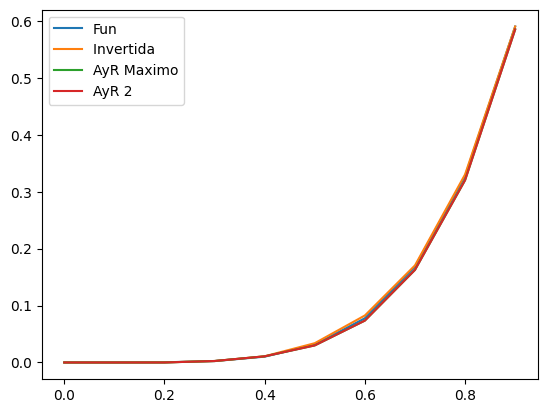

In [42]:
N = 5
vars = [
    ('Invertida ', tinv, [N]),
    ('AyR Maximo', ayr1, [N]),
    ('AyR 2', ayr2, [N]),
]

xs = np.arange(0,1,0.1)
ys = [ fdist(x, N) for x in xs ]
plt.plot(xs, ys, label='Fun')

plot_probs(vars, 10_000)

plt.legend()
plt.show()